##NAME: Allison Ebsen
### ICS 435
### Assignment 1



This script trains and evaluates three different classification models
(KNN, Decision Tree, and Random Forest) on the scikit learn Breast Cancer
dataset. It performs data preprocessing, model training, and evaluation
using various metrics including accuracy, precision, recall, and F1-score.
An ablation study is also conducted to analyze the impact of hyperparameter
tuning on model performance for each of the three models.

 Data Preprocessing:

*   Load the Breast Cancer dataset using load_breast_cancer from sklearn.
*   Partition the data into an 80% training set and a 20% test set.
*   Scale the features using StandardScaler for KNN.






In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preprocessing: Load, split, and scale the Breast Cancer dataset.
# This section prepares the data for use in machine learning models.

# Load the Breast Cancer dataset from scikit-learn.
cancer = load_breast_cancer()

# Split the dataset into training (80%) and testing (20%) sets.
# X represents the features, and y represents the target variable (malignant or benign).
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
# Added random_state for reproducibility

# Scale the features using StandardScaler to ensure features with different
# ranges don't disproportionately influence the model's learning process.
# StandardScaler scales the data to have zero mean and unit variance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)      # Transform the testing data using the same scaling

Model Training:

*   Train three classifiers:

1. K-Nearest Neighbors (KNN): Start with n_neighbors=5.
2. Decision Tree: Use the default settings initially, then experiment
with max_depth.
3. Random Forest: Start with 100 trees (n_estimators=100) and
explore the effect of different max_depth or min_samples_split.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **Model Training:**
# This section focuses on creating and training three different classification models:
# 1. K-Nearest Neighbors (KNN)
# 2. Decision Tree
# 3. Random Forest
#
# Each model is trained using the scaled training data (X_train_scaled) and the corresponding
# target variables (y_train).

# **1. K-Nearest Neighbors (KNN)**
# Create a KNN classifier with 5 neighbors (n_neighbors=5).
# This hyperparameter controls the number of neighboring data points considered for classification.
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the scaled training data and target variables.
knn.fit(X_train_scaled, y_train)

# **2. Decision Tree**
# Create a Decision Tree classifier using default settings.
# The default settings will be used for hyperparameters such as max_depth and min_samples_split.
dt = DecisionTreeClassifier()

# Train the Decision Tree model using the scaled training data and target variables.
dt.fit(X_train_scaled, y_train)

# **3. Random Forest**
# Create a Random Forest classifier with 100 trees (n_estimators=100).
# This hyperparameter controls the number of decision trees in the forest.
rf = RandomForestClassifier(n_estimators=100)

# Train the Random Forest model using the scaled training data and target variables.
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

Evaluation:

*   Use the following metrics to evaluate performance:

1. Accuracy
2. Precision
3.  Recall
4.  F1-score

*   Include a confusion matrix for each model.
*   Compare the results across the models in a tabular or graphical format.

KNN:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1-score: 0.9577464788732394


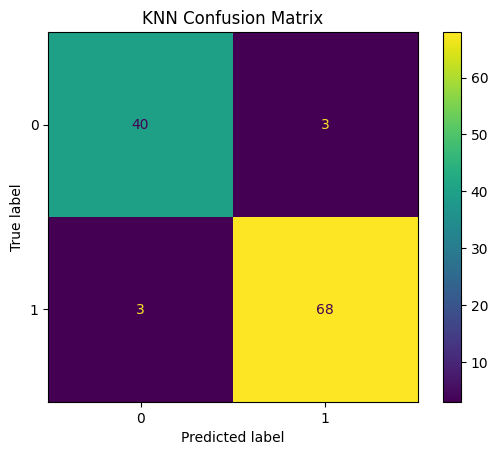

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# **Model Evaluation: K-Nearest Neighbors (KNN)**
# This section evaluates the performance of the trained KNN model using various metrics
# and visualizes the results using a confusion matrix.

# Print the model's name for clarity.
print("KNN:")

# Calculate and print the accuracy of the KNN model on the test data.
# Accuracy represents the percentage of correctly classified instances.
print("Accuracy:", knn.score(X_test_scaled, y_test))

# Calculate and print the precision of the KNN model on the test data.
# Precision measures the proportion of correctly predicted positive instances
# out of all instances predicted as positive.
print("Precision:", precision_score(y_test, knn.predict(X_test_scaled)))

# Calculate and print the recall of the KNN model on the test data.
# Recall measures the proportion of correctly predicted positive instances
# out of all actual positive instances.
print("Recall:", recall_score(y_test, knn.predict(X_test_scaled)))

# Calculate and print the F1-score of the KNN model on the test data.
# The F1-score is the harmonic mean of precision and recall, providing a
# balanced measure of the model's performance.
print("F1-score:", f1_score(y_test, knn.predict(X_test_scaled)))

# Generate and display the confusion matrix for the KNN model.
# The confusion matrix provides a visual representation of the model's
# performance by showing the counts of true positives, true negatives,
# false positives, and false negatives.
disp = ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
disp.ax_.set_title("KNN Confusion Matrix")  # Set the title of the confusion matrix plot.
plt.show()  # Display the confusion matrix plot.


Decision Tree:
Accuracy: 0.9385964912280702
Precision: 0.9444444444444444
Recall: 0.9577464788732394
F1-score: 0.951048951048951


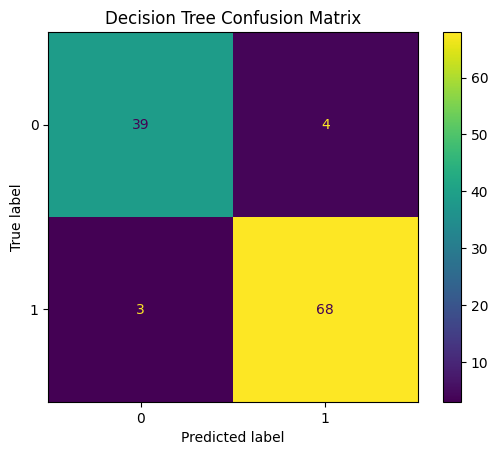

In [42]:
# Get Decision Tree metrics and confusion matrix
print("\nDecision Tree:")

# Evaluate the Decision Tree model's performance using various metrics.

# Calculate and print the accuracy of the Decision Tree model on the test data.
# Accuracy represents the proportion of correctly classified instances (both true positives and true negatives).
print("Accuracy:", dt.score(X_test_scaled, y_test))

# Calculate and print the precision of the Decision Tree model on the test data.
# Precision measures the proportion of correctly predicted positive instances
# out of all instances predicted as positive (true positives / (true positives + false positives)).
# It focuses on the accuracy of positive predictions.
print("Precision:", precision_score(y_test, dt.predict(X_test_scaled)))

# Calculate and print the recall of the Decision Tree model on the test data.
# Recall measures the proportion of correctly predicted positive instances
# out of all actual positive instances (true positives / (true positives + false negatives)).
# It focuses on the ability of the model to identify all positive instances.
print("Recall:", recall_score(y_test, dt.predict(X_test_scaled)))

# Calculate and print the F1-score of the Decision Tree model on the test data.
# The F1-score is the harmonic mean of precision and recall, providing a
# balanced measure of the model's performance, especially when there is an imbalance between classes.
print("F1-score:", f1_score(y_test, dt.predict(X_test_scaled)))

# Generate and display the confusion matrix for the Decision Tree model.
# The confusion matrix provides a visual representation of the model's
# performance by showing the counts of:
# - True Positives (TP): Correctly predicted positive instances
# - True Negatives (TN): Correctly predicted negative instances
# - False Positives (FP): Incorrectly predicted positive instances (Type I error)
# - False Negatives (FN): Incorrectly predicted negative instances (Type II error)
disp = ConfusionMatrixDisplay.from_estimator(dt, X_test_scaled, y_test)
disp.ax_.set_title("Decision Tree Confusion Matrix")  # Set the title of the confusion matrix plot.
plt.show()  # Display the confusion matrix plot.


Random Forest:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1-score: 0.9722222222222222


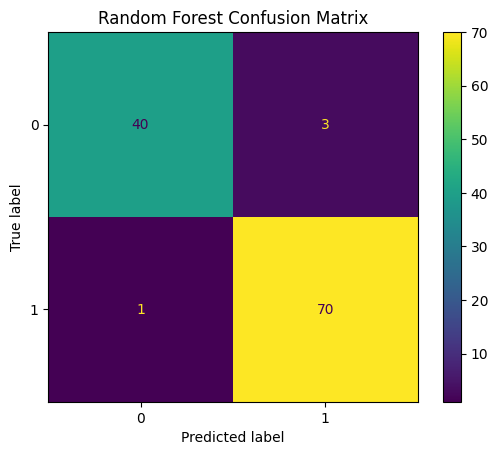

In [43]:
# Get Random Forest metrics and confusion matrix
print("\nRandom Forest:")  # Print a section header for Random Forest results

# Calculate and print the accuracy of the Random Forest model on the test data.
# Accuracy represents the proportion of correctly classified instances (both true positives and true negatives).
print("Accuracy:", rf.score(X_test_scaled, y_test))

# Calculate and print the precision of the Random Forest model on the test data.
# Precision measures the proportion of correctly predicted positive instances
# out of all instances predicted as positive (true positives / (true positives + false positives)).
# It focuses on the accuracy of positive predictions.
print("Precision:", precision_score(y_test, rf.predict(X_test_scaled)))

# Calculate and print the recall of the Random Forest model on the test data.
# Recall measures the proportion of correctly predicted positive instances
# out of all actual positive instances (true positives / (true positives + false negatives)).
# It focuses on the ability of the model to identify all positive instances.
print("Recall:", recall_score(y_test, rf.predict(X_test_scaled)))

# Calculate and print the F1-score of the Random Forest model on the test data.
# The F1-score is the harmonic mean of precision and recall, providing a
# balanced measure of the model's performance, especially when there is an imbalance between classes.
print("F1-score:", f1_score(y_test, rf.predict(X_test_scaled)))

# Generate and display the confusion matrix for the Random Forest model.
# The confusion matrix provides a visual representation of the model's
# performance by showing the counts of:
# - True Positives (TP): Correctly predicted positive instances
# - True Negatives (TN): Correctly predicted negative instances
# - False Positives (FP): Incorrectly predicted positive instances (Type I error)
# - False Negatives (FN): Incorrectly predicted negative instances (Type II error)
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test)
disp.ax_.set_title("Random Forest Confusion Matrix")  # Set the title of the confusion matrix plot.
plt.show()  # Display the confusion matrix plot.

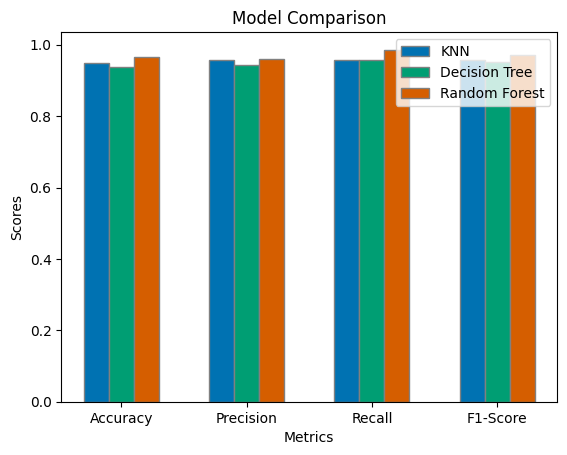

In [44]:
import numpy as np

# This section of code generates a bar graph to compare the performance of
# three machine learning models: K-Nearest Neighbors (KNN), Decision Tree,
# and Random Forest. The comparison is based on four evaluation metrics:
# accuracy, precision, recall, and F1-score.

# Assuming knn, dt, rf, X_test_scaled, and y_test are defined in the previous code
# Organize metrics
models = ['KNN', 'Decision Tree', 'Random Forest']
accuracies = [knn.score(X_test_scaled, y_test), dt.score(X_test_scaled, y_test), rf.score(X_test_scaled, y_test)]
precisions = [precision_score(y_test, knn.predict(X_test_scaled)), precision_score(y_test, dt.predict(X_test_scaled)), precision_score(y_test, rf.predict(X_test_scaled))]
recalls = [recall_score(y_test, knn.predict(X_test_scaled)), recall_score(y_test, dt.predict(X_test_scaled)), recall_score(y_test, rf.predict(X_test_scaled))]
f1_scores = [f1_score(y_test, knn.predict(X_test_scaled)), f1_score(y_test, dt.predict(X_test_scaled)), f1_score(y_test, rf.predict(X_test_scaled))]

# Use a colorblind-friendly palette for better accessibility.
colors = ['#0072B2', '#009E73', '#D55E00']

# Define the evaluation metrics to be compared.
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Organize the data for plotting.
data = [accuracies, precisions, recalls, f1_scores]

# Set the width of each bar and the positions on the x-axis.
bar_width = 0.2
x_pos = np.arange(len(metrics))

# Create the bar graph using matplotlib.pyplot.
fig, ax = plt.subplots() # Create a figure and axes object

# Iterate through models and plot their scores for each metric.
for i, model in enumerate(models):
    ax.bar(x_pos + i * bar_width, [d[i] for d in data], color=colors[i], width=bar_width, edgecolor='grey', label=model)

# Set the labels and title for the graph.
ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(metrics)
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.legend()

# Display the graph.
plt.show()

Ablation Study:
*   Modify key hyperparameters (e.g., n_neighbors for KNN, max_depth for Decision Trees and Random Forest) and observe the impact on
performance.

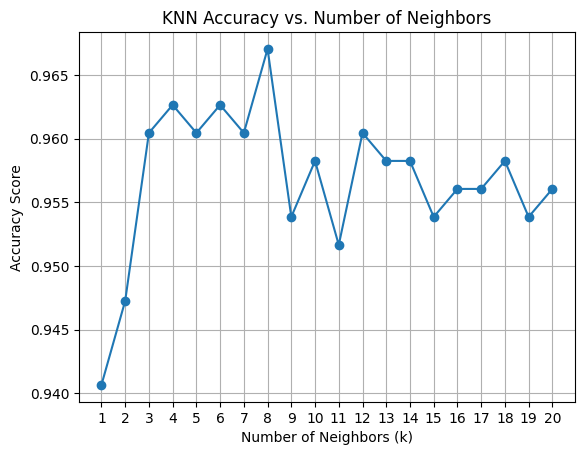

In [45]:
from sklearn.model_selection import cross_val_score

# **Ablation Study for K-Nearest Neighbors (KNN)**
# This code performs an ablation study to find the optimal value for 'k' (number of neighbors)
# in the KNN classifier. It evaluates the model's performance using 5-fold cross-validation
# and plots the accuracy scores for different 'k' values.

# Define a range of 'k' values to test (from 1 to 20).
n_neighbors = range(1, 21)
accuracy_scores = []  # Initialize an empty list to store accuracy scores for each 'k'

# Iterate through each 'k' value in the specified range.
for k in n_neighbors:
    # Create a KNN classifier with the current 'k' value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation and store the accuracy scores in 'scores'.
    # 'cv=5' specifies 5 folds for cross-validation.
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

    # Calculate the average accuracy score across all folds and append it to the 'accuracy_scores' list.
    accuracy_scores.append(np.mean(scores))

# **Visualize the Results**
# Create a line plot to show the relationship between 'k' and accuracy.

# Plot the 'k' values on the x-axis and the corresponding accuracy scores on the y-axis.
plt.plot(n_neighbors, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')  # Label the x-axis
plt.ylabel('Accuracy Score')  # Label the y-axis
plt.title('KNN Accuracy vs. Number of Neighbors')  # Set the title of the plot
plt.xticks(np.arange(min(n_neighbors), max(n_neighbors)+1, 1.0))  # Set x-axis ticks for each 'k' value
plt.grid(True)  # Add a grid to the plot for better readability
plt.show()  # Display the plot

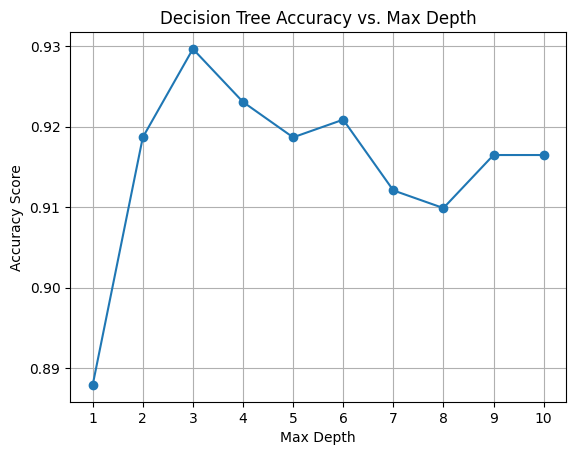

In [46]:
# **Ablation Study for Decision Tree: Evaluating the Impact of Max Depth**
# This code segment performs an ablation study to analyze the effect of varying the
# `max_depth` hyperparameter on the performance of a Decision Tree classifier.
# It uses cross-validation to obtain a more robust estimate of performance.

# Define a range of `max_depth` values to explore.
# `max_depth` controls the maximum depth of the decision tree, which can influence
# model complexity and potential overfitting.
max_depth_values = range(1, 11)  # Exploring depths from 1 to 10
accuracy_scores = []  # Initialize an empty list to store accuracy scores for each depth

# Iterate through each `max_depth` value:
for depth in max_depth_values:
    # Create a Decision Tree classifier with the current `max_depth`.
    dt_classifier = DecisionTreeClassifier(max_depth=depth)

    # Perform 5-fold cross-validation to evaluate the model's performance.
    # `cross_val_score` splits the training data into 5 folds, trains the model on 4 folds,
    # and evaluates it on the remaining fold. This process is repeated 5 times
    # to obtain a more reliable performance estimate.
    scores = cross_val_score(dt_classifier, X_train_scaled, y_train, cv=5)

    # Calculate the average accuracy score across all 5 folds and store it.
    average_accuracy = np.mean(scores)
    accuracy_scores.append(average_accuracy)

# Visualize the Results:
# Create a line plot to illustrate the relationship between `max_depth` and accuracy.
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Max Depth')  # Label the x-axis
plt.ylabel('Accuracy Score')  # Label the y-axis
plt.title('Decision Tree Accuracy vs. Max Depth')  # Set the title of the plot
plt.xticks(np.arange(min(max_depth_values), max(max_depth_values) + 1, 1.0))  # Set x-axis ticks
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot

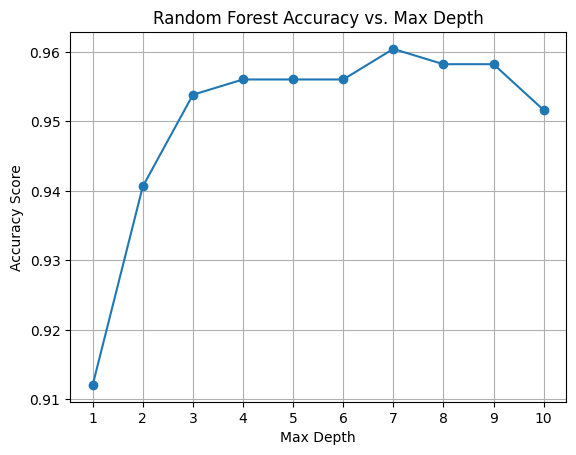

In [47]:
# **Ablation Study for Random Forest: Evaluating the Impact of Max Depth**
# This code segment performs an ablation study to analyze the effect of varying the
# `max_depth` hyperparameter on the performance of a Random Forest classifier.
# It uses 5-fold cross-validation to obtain a more robust estimate of performance and
# then visualizes the results using a line plot.

# Import necessary libraries (if not already imported)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define a range of `max_depth` values to explore.
# `max_depth` controls the maximum depth of each tree in the forest,
# which can influence model complexity and potential overfitting.
max_depth_values = range(1, 11)  # Exploring depths from 1 to 10

# Initialize an empty list to store the average accuracy scores for each `max_depth`.
accuracy_scores = []

# Iterate through each `max_depth` value in the specified range:
for depth in max_depth_values:
    # Create a Random Forest classifier with the current `max_depth`.
    rf_classifier = RandomForestClassifier(max_depth=depth)

    # Perform 5-fold cross-validation to evaluate the model's performance.
    # `cross_val_score` splits the training data into 5 folds, trains the model on 4 folds,
    # and evaluates it on the remaining fold. This process is repeated 5 times
    # to obtain a more reliable performance estimate.
    scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)

    # Calculate the average accuracy score across all 5 folds and store it.
    average_accuracy = np.mean(scores)
    accuracy_scores.append(average_accuracy)

# Visualize the Results:
# Create a line plot to illustrate the relationship between `max_depth` and accuracy.
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Max Depth')  # Label the x-axis
plt.ylabel('Accuracy Score')  # Label the y-axis
plt.title('Random Forest Accuracy vs. Max Depth')  # Set the title of the plot
plt.xticks(np.arange(min(max_depth_values), max(max_depth_values) + 1, 1.0))  # Set x-axis ticks for better readability
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot